In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from solvers.ga.ga_solver import GeneticAlgorithmSolver
from problem.sudoku_manager import Sudoku, generate_boards
from time import perf_counter
from statistics import mean

In [2]:
SEED = 14

In [3]:
NUM_OF_RUNS = 5
NUM_OF_SUDOKUS = 5
START_ID = 0

In [4]:
suds_easy = [Sudoku('easy', id) for id in range(START_ID, START_ID + NUM_OF_SUDOKUS)]
suds_medium = [Sudoku('medium', id) for id in range(START_ID, START_ID + NUM_OF_SUDOKUS)]
suds_hard = [Sudoku('medium', id) for id in range(START_ID, START_ID + NUM_OF_SUDOKUS)]

In [5]:
POPULATION_SIZE = 300
PC = 0.8
PM = 0.1
MAX_EPOCH = 1000
RESET_COUNT = 150
SUCC_RATE = 1

In [6]:
solver = GeneticAlgorithmSolver(
    pop_size=POPULATION_SIZE,
    pc=PC,
    pm=PM,
    max_epoch=MAX_EPOCH,
    reset_condition_val=RESET_COUNT,
    succession_rate=SUCC_RATE,
    seed=SEED,
)

In [7]:
def test_ga_solver(solver, sudokus, candidates):
    best_chrom_list = []
    best_scores_list = []
    best_per_iters = []
    exec_times = []
    for i in range(NUM_OF_SUDOKUS):
        print(sudokus[i].board)
        for j in range(NUM_OF_RUNS):
            start_time = perf_counter()
            results = solver.solve(sudoku=sudokus[i], is_candidate_mode=candidates)
            exec_times.append(perf_counter() - start_time)
            best_chrom_list.append(results[0])
            best_scores_list.append(results[1])
            best_per_iters.append(results[2])
    return best_chrom_list, best_scores_list, best_per_iters, exec_times

In [8]:
best_chroms, best_scores, best_per_iters, exec_times = test_ga_solver(solver, suds_easy, candidates=False)

Improvement! Score: 228/243
Epoch: 0 best_global: 228/243, best_local: 228/243
Improvement! Score: 232/243
Epoch: 1 best_global: 232/243, best_local: 232/243
Epoch: 2 best_global: 232/243, best_local: 232/243
Epoch: 3 best_global: 232/243, best_local: 231/243
Epoch: 4 best_global: 232/243, best_local: 229/243
Epoch: 5 best_global: 232/243, best_local: 232/243
Epoch: 6 best_global: 232/243, best_local: 232/243
Improvement! Score: 233/243
Epoch: 7 best_global: 233/243, best_local: 233/243
Epoch: 8 best_global: 233/243, best_local: 232/243
Epoch: 9 best_global: 233/243, best_local: 228/243
Epoch: 10 best_global: 233/243, best_local: 229/243
Epoch: 11 best_global: 233/243, best_local: 229/243
Epoch: 12 best_global: 233/243, best_local: 229/243
Epoch: 13 best_global: 233/243, best_local: 229/243
Epoch: 14 best_global: 233/243, best_local: 229/243
Epoch: 15 best_global: 233/243, best_local: 230/243
Epoch: 16 best_global: 233/243, best_local: 231/243
Epoch: 17 best_global: 233/243, best_local

In [10]:
def normalize_arr(arr):
    if arr.shape[0] == MAX_EPOCH:
      return arr
    else:
      norm_arr = np.zeros((MAX_EPOCH,))
      norm_arr[:len(arr)] = arr
      norm_arr[len(arr):] = max(arr)
      return norm_arr

In [47]:
def normalize_best_per_iters(best_per_iters):
    best_iters_avg = []
    best_iters_max = []
    best_iters_min = []
    normalized_best_iters = np.array([normalize_arr(bests) for bests in best_per_iters])
    print(normalized_best_iters.shape)
    for i in range(best_per_iters.shape[1]):
        best_iters_avg.append(mean(normalized_best_iters[:, i]))
        best_iters_max.append(max(normalized_best_iters[:, i]))
        best_iters_min.append(min(normalized_best_iters[:, i]))
    return best_iters_avg, best_iters_max, best_iters_min

In [48]:
best_per_iters_avg, best_per_iters_max, best_per_iters_min = normalize_best_per_iters(best_per_iters)

(4, 700)


In [51]:
mean(best_scores)

240

In [54]:
mean(exec_times)

[90.27795374200001, 92.972157477, 96.32843947, 94.39854436799999]


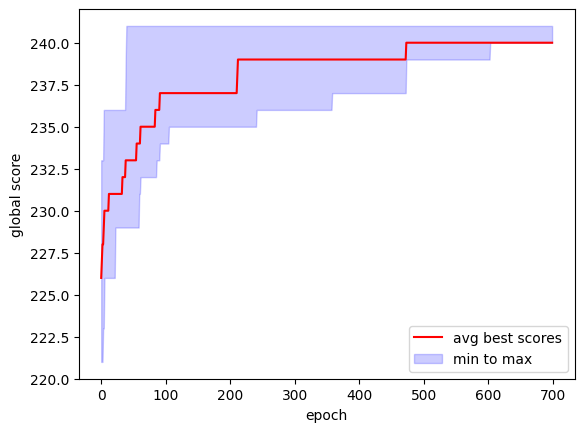

In [50]:
plt.figure()
plt.fill_between(range(MAX_EPOCH), best_per_iters_min, best_per_iters_max, color='b', alpha=0.2, label='min to max')
plt.plot(range(MAX_EPOCH), (best_per_iters_avg), 'r', label='avg best scores')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('global score')
plt.show()